### Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
#importing the dataset using read_csv
df = pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


By looking at the dataset and problem statement, I can say that Loan_Status is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [3]:
#Checking shape
df.shape

(614, 13)

Our dataset has 614 rows and 13 columns

In [4]:
#Checking missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

I can see null values present in these columns:
- Gender Married Dependents Self_Employed LoanAmount Loan_Amount_Term Credit_History 

In [5]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area
       
----------------------------------------------------  
   Output feature:
- Loan_Status

Task: Predict whether the loan of the applicant will be approved or not

In [6]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Cred

I can see there are no empty observations in dataset

In [10]:
#Checking unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

I see that all the features are useful as unique value is more than 2 and less than total rows.

In [11]:
#Checking data type of columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- ApplicantIncome is integer column.
- 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status' are of object datatypes.
- 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' are of object datatypes.

## EDA

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

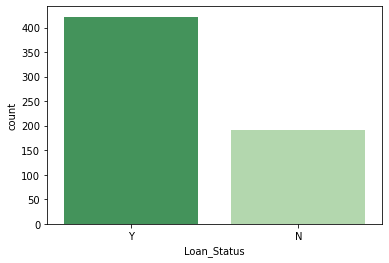

In [12]:
#Analysing our target variable 
sns.countplot(df["Loan_Status"],palette="Greens_r")

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!
- The number of people granted loan is double than the people with ungranted loan.
- Also, I see class imbalance which I will treat later.

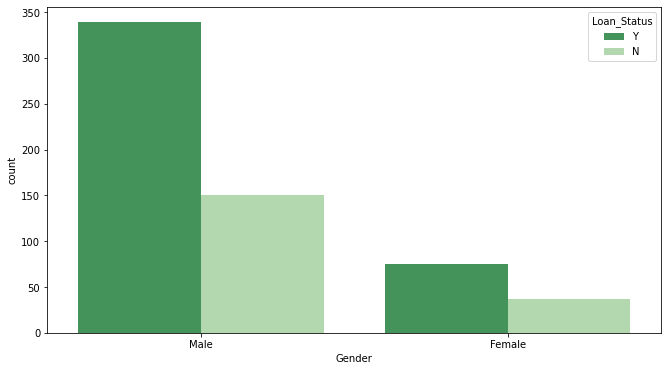

In [21]:
#Checking Loan status of Individuals of Different Gender
plt.figure(figsize=(11,6))
sns.countplot(df["Gender"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

We can see a significant gap in the earnings between males and females over here.

- For both gender, there are more than 50% of the adults with approved loan.
- Males tend to apply for loan more than females.

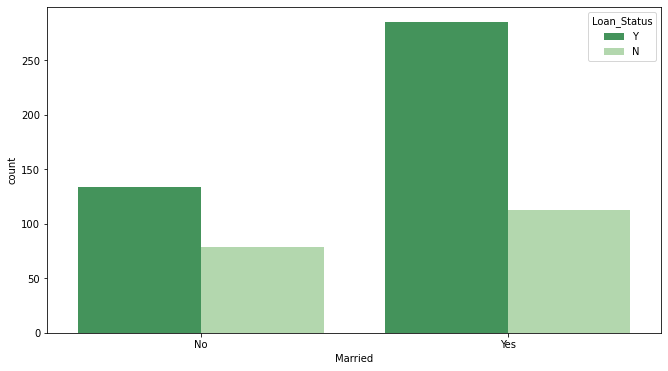

In [22]:
#Checking Loan status of Individuals of Different Marital status 
plt.figure(figsize=(11,6))
sns.countplot(df["Married"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- The chance of getting a loan when married is slightly greater than unmarried.
- This shows married individuals apply for loan more than a single person.

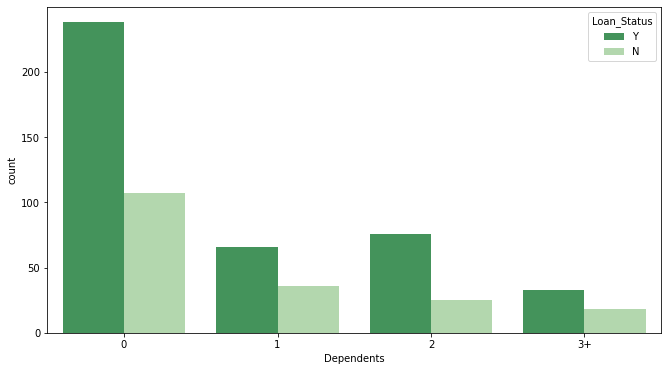

In [25]:
#Checking Loan status of Individuals of Different Dependents group
plt.figure(figsize=(11,6))
sns.countplot(df["Dependents"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

We have a very interesting observation here:
- An individual with no dependents tend to apply for loan rather than an individual with dependents.
- Chance of getting a loan is similar for all categories.

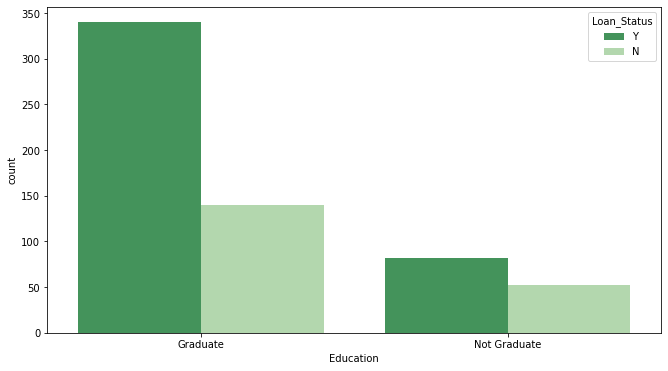

In [26]:
#Checking Loan status of Individuals of Different Education group
plt.figure(figsize=(11,6))
sns.countplot(df["Education"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- Graduates are tend to apply for loan more than non-graduates.

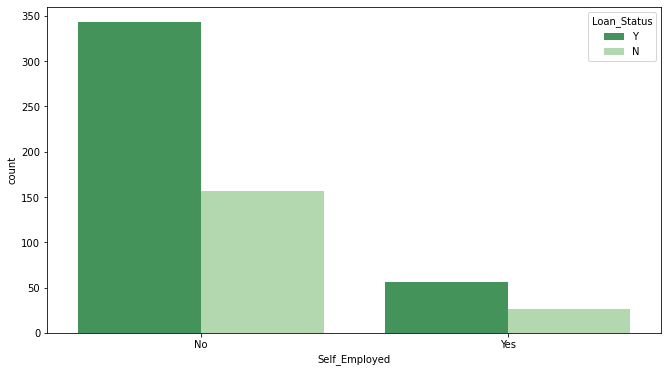

In [27]:
#Checking Loan status of Individuals of Different Employment status
plt.figure(figsize=(11,6))
sns.countplot(df["Self_Employed"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- If a person is self employed, there's a greater chance that they'll apply for loan.
- However, the approval rate is same in both the categories.

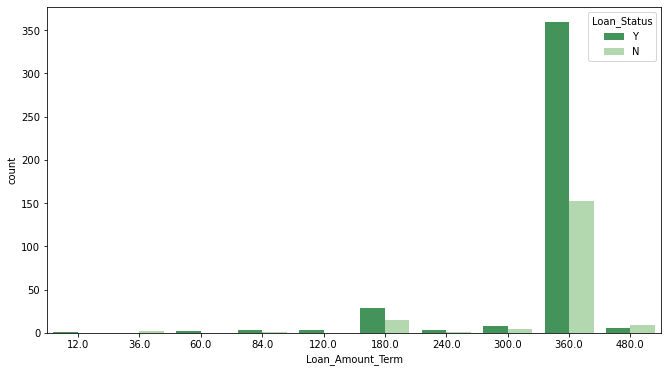

In [28]:
#Checking Loan status of Individuals of Different Loan amount term
plt.figure(figsize=(11,6))
sns.countplot(df["Loan_Amount_Term"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

- An important point to notice over here is that, except 360 days there are very few individuals with different term.
- Also, the chance of rejection of loan increases with increment of loan amount term.

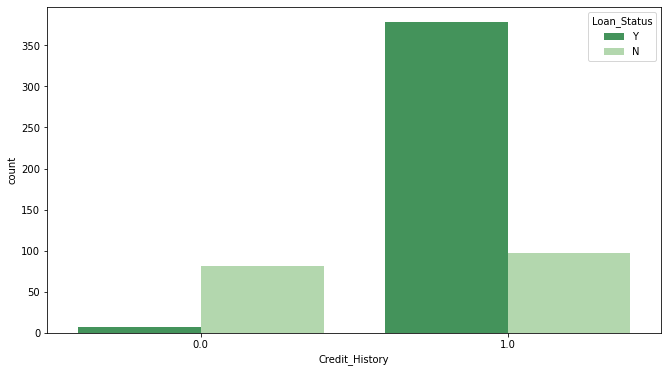

In [29]:
#Checking Loan status of Individuals of Different credit history
plt.figure(figsize=(11,6))
sns.countplot(df["Credit_History"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

We have an interesting observation:
- A person with credit history has greater chance of loan approvals.
- With no credit history, there's only 10-15% chance of getting a loan.

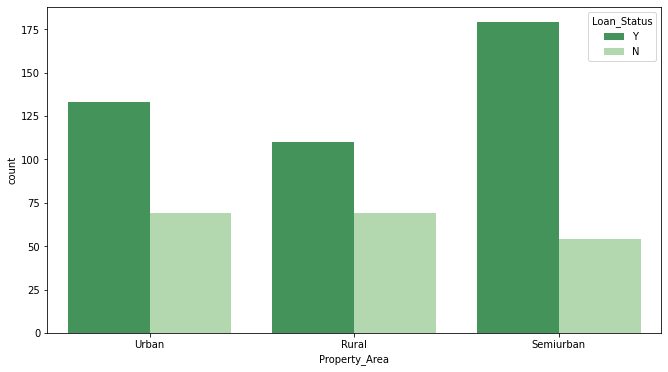

In [30]:
#Checking Loan status of Individuals of Different Areas
plt.figure(figsize=(11,6))
sns.countplot(df["Property_Area"],hue=df["Loan_Status"],palette="Greens_r")
plt.show()

The approval rate for Semiurban region is greater than that of other 2 categories.

In [32]:
#Encoding my target variable so that I can check the correlation with numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [34]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

The target values are encoded now. 

## Multi-variate Analysis

In [36]:
#describing the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


Observation:
- The minimum and maximum of Applicant Income is 150 & 81000 respectively, while the average age is 5400.
- While the minimum Coapplicant Income is 0 and maximum is 41667.
- We can notice the loan amount varying between 9 to 700 and mean being 146.
- The term is from 12 days to 480 days in this dataset.

<AxesSubplot:>

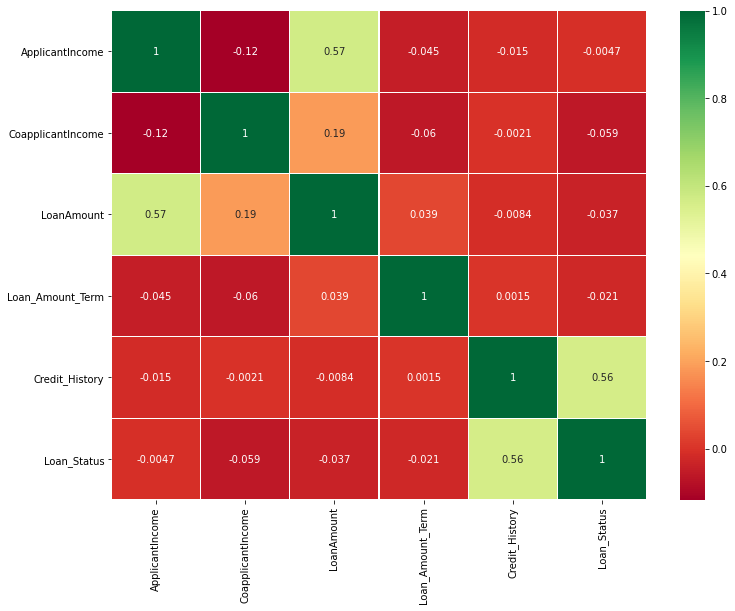

In [37]:
#Plotting heatmap with all features
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that Credit history is positively correlated with the target variable. 
    Whereas, other continuous features shows no relation/slightly negative relation.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

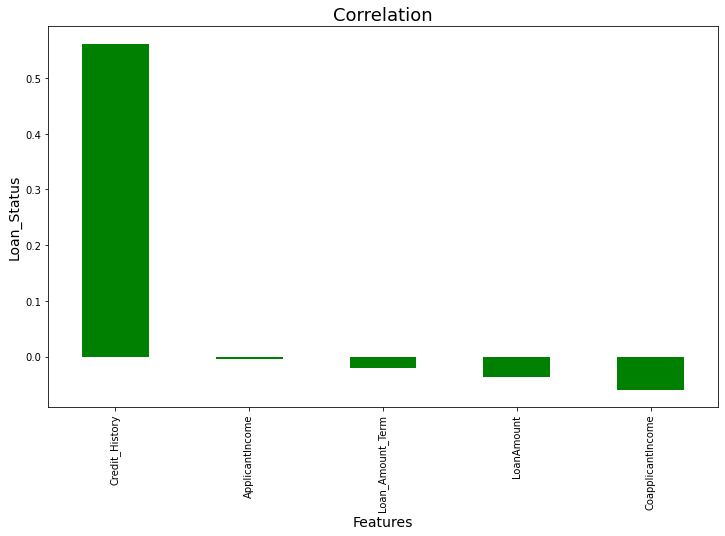

In [39]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(12,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- I notice that most of the numerical features are unrelated with target.
- Credit history shows highest correlation than other features.

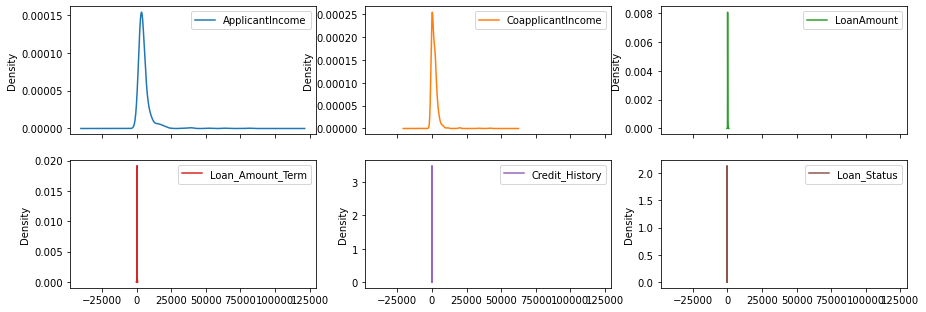

In [53]:
#Checking distribution with density graph
df.plot(kind="density",subplots=True,layout=(3,3),figsize=(15,8))
plt.show()

I can see that Applicant income and Coapplicant income is highly postively skewed. 

<Figure size 432x288 with 0 Axes>

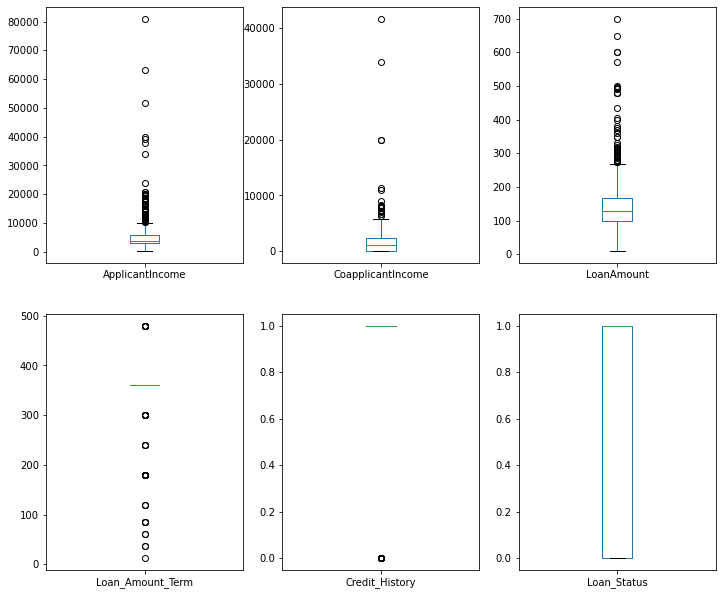

In [40]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(12,16))
plt.show()

In [42]:
df.columns[df.dtypes != "object"]

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

As observed from boxplot, there is skewness present in numeric columns and I need to remove this. 

    'ApplicantIncome' - Numerical
    'CoapplicantIncome' - Numerical
    'LoanAmount' - Numerical
    'Loan_Amount_Term' - Categorical - No need to remove skewness. 
    'Credit_History' - Categorical- No need to remove skewness. 
    'Loan_Status' - Target - No need to remove skewness.

## Data cleaning

### Treating Null/missing values

Previously we got null values in these columns:
- Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History - Categorical
- LoanAmount - Continuous

In [43]:
#For continuous & with outliers, I'll be using median to remove & fill null values
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [44]:
#For categorical columns, I'll be using mode to remove & fill null values
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


I've successfully removed the null values.

### Treating Outliers

In [58]:
#Creating list of all the contnuous columns with outliers
dfContCols=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [55]:
#copying df to df1
df1 = df.copy()

In [59]:
#Using Zscore to remove outliers
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df1[(ZS<3).all(axis=1)]
df1.shape

(589, 13)

In [61]:
#previous shape
df.shape

(614, 13)

I've succefully removed the outliers using zscore and rows in my new dataset are 589 whereas previously we had 614 rows.

In [62]:
#Checking the data loss
((614-589)/614)*100

4.071661237785016

So I get data loss of 4% hence I'll proceed with zscore.

### Treating Skewness

In [63]:
#check skewness
df1.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.114173
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Loan_Status         -0.828815
dtype: float64

Keeping skewness range as +/-0.5

I will try to remove the skewness only in continuous colums. These are:
'ApplicantIncome','CoapplicantIncome','LoanAmount'

In [184]:
#Creating list of all the continuous columns with skewness
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [64]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

df1[cols] = PT.fit_transform(df1[cols].values)
df1.skew()

ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.061412
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Loan_Status         -0.828815
dtype: float64

I can notice that skewness has been removed. Let me check the distribution. 

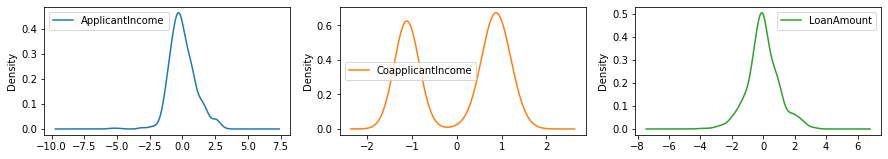

In [69]:
#Checking distribution with density graph
df1[cols].plot(kind="density",subplots=True,sharex=False,layout=(3,3),figsize=(15,8))
plt.show()

My continuous features now looks normally distributed.

### Encoding

In [74]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df1.columns[df1.dtypes == "object"]

In [75]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])   #.astype(str) will embed all values in str type

In [76]:
#checking the columns and its type after encoding
df1[categorical_columns]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,584,0,0,0,0,0,0
610,585,1,1,3,0,0,0
611,586,1,1,1,0,0,2
612,587,1,1,2,0,0,2


I've successfully encoded all the categorical columns

### Splitting independent & target variable

In [78]:
X = df1.drop("Loan_Status",axis=1)
y = df1["Loan_Status"]

### Treating class imbalance

In [79]:
#Treating Class imbalance in target
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(X, y)
y.value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

I can see that the targe column was balanced using SMOTE

### Scaling

In [80]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score            #using accuracy_score as this is categorical data
from sklearn.model_selection import train_test_split, cross_val_score

In [81]:
#Using StandardScaler to scale the independent variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [82]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.718562,0.521416,-1.148516,-0.686050,-0.479174,-0.327846,0.707786,-1.119100,-0.012781,0.275343,0.563163,1.348475
1,-1.712715,0.521416,0.870689,0.392029,-0.479174,-0.327846,0.245248,0.826325,-0.012781,0.275343,0.563163,-1.207192
2,-1.706868,0.521416,0.870689,-0.686050,-0.479174,3.050213,-0.543228,-1.119100,-1.478796,0.275343,0.563163,1.348475
3,-1.701020,0.521416,0.870689,-0.686050,2.086927,-0.327846,-0.817205,0.983159,-0.172988,0.275343,0.563163,1.348475
4,-1.695173,0.521416,-1.148516,-0.686050,-0.479174,-0.327846,0.756490,-1.119100,0.235051,0.275343,0.563163,1.348475
...,...,...,...,...,...,...,...,...,...,...,...,...
809,-0.607574,0.521416,-1.148516,-0.686050,-0.479174,-0.327846,1.945661,-1.119100,-0.918324,0.275343,0.563163,0.070642
810,0.135034,-1.917853,-1.148516,-0.686050,-0.479174,-0.327846,-0.139206,0.101494,-0.058538,2.142202,0.563163,-1.207192
811,1.585166,0.521416,0.870689,0.392029,-0.479174,-0.327846,-0.711397,-0.746603,-0.323552,0.275343,-2.014301,-1.207192
812,-1.051969,0.521416,-1.148516,-0.686050,-0.479174,-0.327846,1.002433,-0.291452,0.257290,0.275343,0.563163,-1.207192


The data looks scaled now. 

### FIND BEST random_state 

In [83]:
#Using for loop to find best random state between 1 to 200
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = LogisticRegression()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8204081632653061  on Random_state  69


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = maxRS)

### Algorithms

In [88]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [106]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8204
CROSS VALIDATION SCORE: 0.7272438082254034
CONFUSION MATRIX:
[[ 86  31]
 [ 13 115]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.868687    0.787671  0.820408    0.828179      0.826360
recall       0.735043    0.898438  0.820408    0.816740      0.820408
f1-score     0.796296    0.839416  0.820408    0.817856      0.818824
support    117.000000  128.000000  0.820408  245.000000    245.000000


####  Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8857
CROSS VALIDATION SCORE: 0.5539498598803301
CONFUSION MATRIX:
[[ 99  18]
 [ 10 118]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.908257    0.867647  0.885714    0.887952      0.887040
recall       0.846154    0.921875  0.885714    0.884014      0.885714
f1-score     0.876106    0.893939  0.885714    0.885023      0.885423
support    117.000000  128.000000  0.885714  245.000000    245.000000


#### Support Vector Machine

In [108]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8245
CROSS VALIDATION SCORE: 0.7223282587290767
CONFUSION MATRIX:
[[ 85  32]
 [ 11 117]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.885417    0.785235   0.82449    0.835326      0.833077
recall       0.726496    0.914062   0.82449    0.820279      0.824490
f1-score     0.798122    0.844765   0.82449    0.821444      0.822491
support    117.000000  128.000000   0.82449  245.000000    245.000000


#### AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8245
CROSS VALIDATION SCORE: 0.4078845716882527
CONFUSION MATRIX:
[[ 94  23]
 [ 20 108]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.824561    0.824427   0.82449    0.824494      0.824491
recall       0.803419    0.843750   0.82449    0.823584      0.824490
f1-score     0.813853    0.833977   0.82449    0.823915      0.824367
support    117.000000  128.000000   0.82449  245.000000    245.000000


I got the accuracy_score & cross validation scores of all the algorithms
On checking the difference between accuracy_score & cross_val_score, I found that Support Vector Machine has least difference. Hence, I will tune this model.

## HYPERPARAMETER TUNING

In [95]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [109]:
#SVC Tuning

#Creating SVC parameters dictionary

param_grid = [
    {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['linear']},
    #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}
]

In [110]:
#Create a GridSearchCV object and fit it to the training data
SVC_hp = GridSearchCV(SVC(),param_grid,refit=True)   #or cv=5
SVC_hp.fit(X_train,y_train)
SVC_hp.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [111]:
#Using the best parameters
final_mod = SVC( C= 1, gamma= 0.01, kernel= 'linear' )
final_mod.fit(X_train,y_train)
pred = final_mod.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,pred)*100)
print("Cross validation score:", cross_val_score(final_mod,X,y,cv=10).mean()*100)

Accuracy Score: 82.44897959183673
Cross validation score: 72.14092140921407


### After tuning, the accuracy increased to 82.44%

## ROC-AUC Curve

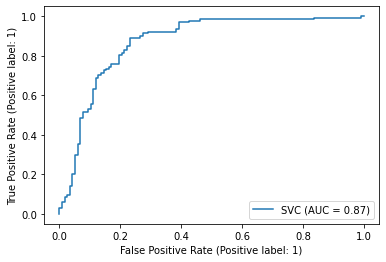

In [112]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test,y_test)

The AUC score of my final model(SVC) is 0.87

## SERIALIZATON (Saving model)

In [113]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"loan_status.pkl")

['loan_status.pkl']

### Done :)